[[  3.64164559e+01]
 [ -1.33308857e-02]]
0.0503071104551 0.22429246633601396
[[ 0.00966405]]
[[ 0.01576723]]


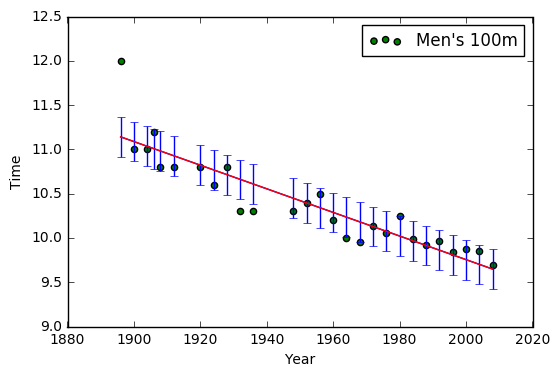

In [31]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv

def linreg(data, degree):
    global toMatrix
    check = toMatrix.as_matrix()
   

    matrixt = toMatrix.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    toMatrix = toMatrix.drop('Time', 1)
    toMatrix.insert(0, 'Const', 1)
    #print (toMatrix)
    
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            toMatrix['Order' + str(count)] = toMatrix['Year']**count
    #print (toMatrix)
    matrixX = toMatrix.as_matrix()
    matrixXt = matrixX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    term2 = np.matmul(matrixXt, matrixt)
    return np.matmul(invert, term2)
  
def linreg2(data, degree):
    
    matrixt = data.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    data = data.drop('Time', 1)
    data.insert(0, 'Const', 1)
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            data['Order' + str(count)] = data['Year']**count
    matrixX = data.as_matrix()
    matrixXt = matrixX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    term2 = np.matmul(matrixXt, matrixt)
    return np.matmul(invert, term2)

def predict(w, year, degree, norm):
    if norm==0:
        meanminus = year - yearmean
        year = meanminus/yearstd
    
    y = w[1,0]*year+w[0,0]
    count = 1   
    while count < degree:
        count = count + 1
        y = y + year**count * w[count,0]
    #print (y)
    return y
    
def predictVariance(likelihood, data, year, degree, norm):
    newX = np.matrix([[1], [year]])
    matrixt = data.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    data = data.drop('Time', 1)
    data.insert(0, 'Const', 1)
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            data['Order' + str(count)] = data['Year']**count
    matrixX = data.as_matrix()
    matrixXt = matrixX.transpose()
    newXt = newX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    final = likelihood * np.dot(np.dot(newXt, invert), newX)
    return final

def scaleData(data, row, option):
    #print(yearmean)
    
    if (option == 1):
        for index,rows in data.iterrows():            
             
            meanminus = rows[row] - yearmean
            newframe = meanminus/yearstd
            data[row].iloc[index] = newframe 
            
    return data
            
def likelihood(w, data, degree):
    matrixt = data.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    data = data.drop('Time', 1)
    data.insert(0, 'Const', 1)
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            data['Order' + str(count)] = data['Year']**count
    matrixX = data.as_matrix()
    matrixtT = matrixt.transpose()
    matrixXt = matrixX.transpose()
    term1 = np.matmul(matrixtT, matrixt)
    term2 = np.matmul(matrixtT, matrixX)
    term3 = np.matmul(term2, w)
    likelihood = (np.subtract(term1, term3))/len(data)
    return (likelihood)
male100 = pd.read_csv('male100.csv', header = 0)
female100 = pd.read_csv('female100.csv',header=0)

#male100.to_csv('demo.csv')

#male100.plot(x=0,y=1, kind ='scatter', color='g', marker='v'', label="Men’s 100m")

copymale100 = male100.copy()
#print(copymale100)
timemean = copymale100['Time'].mean()
timestd = copymale100['Time'].std()

yearmean = copymale100['Year'].mean()
yearstd = copymale100['Year'].std()

#To get some basic statistics, we can use the describe() method:
#print copymale100['Time'].describe(), "\n"
#print (yearmean, yearstd)




#copymale100 = scaleData(copymale100, 'Year', 1)
#print(copymale100)

toMatrix = copymale100.copy()
degree = 1
w = linreg2(copymale100, degree)
print (w)
likelihood = likelihood(w, copymale100, degree)
std = math.sqrt(likelihood.item((0,0)))
print (likelihood[0][0], std)
ax = male100.plot(x=0,y=1, kind ='scatter', color='g', label="Men's 100m")
#female100.plot(x=0,y=1, kind ='scatter', color='r', label="Women's 100m", ax = ax)
#print (toMatrix)
y = w[1,0]*copymale100['Year']+w[0,0]
count = 1
while count < degree:
    count = count + 1
    y = y + toMatrix['Order' + str(count)] * w[count,0]
plt.errorbar(male100['Year'],y, std)
plt.plot(male100['Year'],y,'r-',color = 'r')

print (predictVariance(likelihood[0][0],copymale100, 2024, 1, 1))
print (predictVariance(likelihood[0][0],copymale100, 2048, 1, 1))

years = np.array(range(1896, 2052, 4))
times = np.zeros(len(years))
pred_error = np.zeros(len(years))

j=0
for i in years:
    times[j], pred_error[j] =   predictVariance(male100, 'Year', 'Time', 1, i)
    j = j + 1
    
print 'Linear Regression of Year vs Winning Time with 1 standard deviation of predictive distribution error bars'
male100.plot(x=0,y=1,kind='scatter')
plt.plot(years,times,color = 'r')
plt.errorbar(years,times,yerr=2*np.sqrt(pred_error),color = 'b', linestyle="None")


Linear Regression of Year vs Winning Time
Linear Regression of Year vs Winning Time with 1 standard deviation error bars
Linear Regression of Year vs Winning Time with 1 standard deviation of predictive distribution error bars


<Container object of 3 artists>

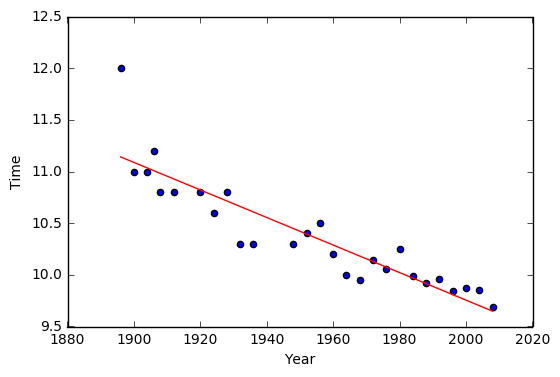

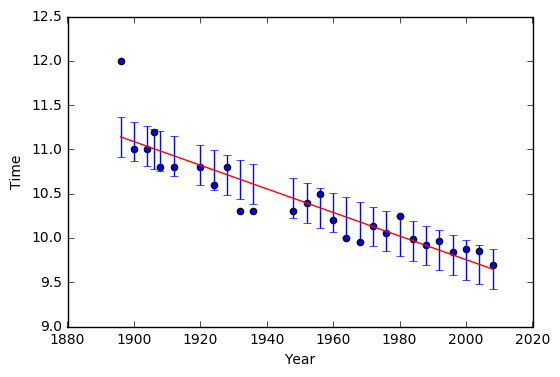

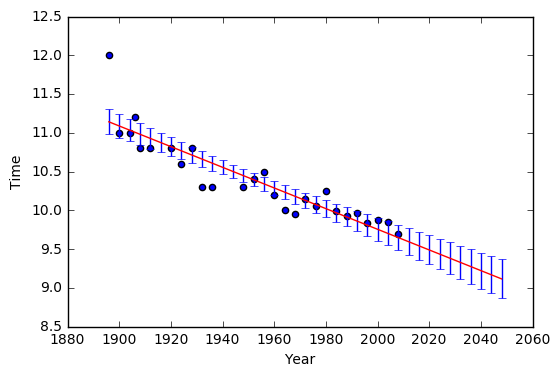

In [37]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 02 18:53:50 2017

@author: joe
"""

%matplotlib inline 
# Produce plots in iPython notebook
###################################################################
## call required modules
###################################################################
import pandas as pd
import numpy as np
import math
from numpy.linalg import inv as inverse
import matplotlib.pyplot as plt

###################################################################
## Define functions
###################################################################

# Linear Regression Function for order i polynomial, same as Assignment 1. 
# Produces parameter weights.
def matrixLinReg(dataFrame,xLabel,tLabel,order):
    df = dataFrame.copy() # copy dataframe so don't alter original dataset
    
    #need to add 1s to matrix for intercept calculations - can do in the data frame or in the matrix
    df['1s'] = 1 

    #note that 1s are at the start - will effect which item of matrix w is the intercept
    x = df.as_matrix(columns = ['1s'])
    t = df.as_matrix(columns = [tLabel])

    #for loop to add higher order terms
    for i in range(1,order+1):
        xn = df[xLabel]**i
        x = np.insert(x,i,xn,axis=1)

    #matrix calculations needed
    xT = x.transpose()
    xTx = np.dot(xT,x)
    invxTx = inverse(xTx)
    
    w = np.dot(np.dot(invxTx,xT),t)

    return w

# Extension of Linear regression function to also return Maximum 
# Likelihood Estimate for sample the model variance
def matrixML(dataFrame,xLabel,tLabel,order):
    df = dataFrame.copy() # copy dataframe so don't alter original dataset
    
    #need to add 1s to matrix for intercept calculations - can do in the data frame or in the matrix
    df['1s'] = 1 

    #note that 1s are at the start - will effect which item of matrix w is the intercept
    x = df.as_matrix(columns = ['1s'])
    t = df.as_matrix(columns = [tLabel])

    #for loop to add higher order terms
    for i in range(1,order+1):
        xn = df[xLabel]**i
        x = np.insert(x,i,xn,axis=1)

    #matrix calculations needed
    xT = x.transpose()
    xTx = np.dot(xT,x)
    invxTx = inverse(xTx)
    
    w = np.dot(np.dot(invxTx,xT),t)
    
    tT = t.transpose()
    tTt = np.dot(tT, t)
    tTxw = np.dot(np.dot(tT, x), w)
    N = len(t)
    
    s2 = (tTt - tTxw) / N

    return w, s2

# Function that returns the predictive distribution of at some new x value
def predictML(dataFrame,xLabel,tLabel,order, xPredict):
    df = dataFrame.copy() # copy dataframe so don't alter original dataset
    
    #need to add 1s to matrix for intercept calculations - can do in the data frame or in the matrix
    df['1s'] = 1 

    #note that 1s are at the start - will effect which item of matrix w is the intercept
    x = df.as_matrix(columns = ['1s'])
    t = df.as_matrix(columns = [tLabel])
    #vector to hold the nex x values of each order
    xNew = np.ones(order+1)

    #for loop to add higher order terms
    for i in range(1,order+1):
        xn = df[xLabel]**i
        x = np.insert(x,i,xn,axis=1)
        xNew[i] = xPredict**i 
    #matrix calculations needed
    xT = x.transpose()
    xTx = np.dot(xT,x)
    invxTx = inverse(xTx)
    
    w = np.dot(np.dot(invxTx,xT),t)
    #predictive distribution mean at xNew
    tNew = np.dot(xNew, w)
    tNew= tNew.item((0))
    
    tT = t.transpose()
    tTt = np.dot(tT, t)
    tTxw = np.dot(np.dot(tT, x), w)
    N = len(t)
    
    s2 = (tTt - tTxw) / N
    xNewT = xNew.transpose()
    
    #predictive distribution variance at xNew
    s2New = s2*np.dot(np.dot(xNewT, invxTx), xNew)
    s2New = s2New.item((0))

    return tNew, s2New
    
###################################################################
## Parameter estimation
###################################################################
male100 = pd.read_csv('male100.csv')

W = matrixLinReg(male100, 'Year', 'Time', 1)

w0 = W.item((0,0))
w1 = W.item((1,0))
    
y = w0 + w1*male100['Year']

print ('Linear Regression of Year vs Winning Time')
male100.plot(x=0,y=1,kind='scatter')
plt.plot(male100['Year'],y,color = 'r')

###################################################################
## Parameter and standard deviation estimation
###################################################################
w, s2 = matrixML(male100, 'Year', 'Time', 1)

w0 = w.item((0,0))
w1 = w.item((1,0))

std = math.sqrt(s2.item((0,0)))

y = w0 + w1*male100['Year']

print ('Linear Regression of Year vs Winning Time with 1 standard deviation error bars')
male100.plot(x=0,y=1,kind='scatter')
plt.plot(male100['Year'],y,color = 'r')
plt.errorbar(male100['Year'],y,yerr=std, linestyle="None")

###################################################################
## Predictive distribution estimation
###################################################################
years = np.array(range(1896, 2052, 4))
times = np.zeros(len(years))
pred_error = np.zeros(len(years))

j=0
for i in years:
    times[j], pred_error[j] =   predictML(male100, 'Year', 'Time', 1, i)
    j = j + 1
    
print ('Linear Regression of Year vs Winning Time with 1 standard deviation of predictive distribution error bars')
male100.plot(x=0,y=1,kind='scatter')
plt.plot(years,times,color = 'r')
#Why 2*np.sqrt
plt.errorbar(years,times,yerr=2*np.sqrt(pred_error),color = 'b', linestyle="None")

